<a href="https://colab.research.google.com/github/twizz0328/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_7%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스 기반 데이터 분석 7강 - 데이터 전처리 2

### 7-1 데이터 결측치 찾기

In [8]:
import pandas as pd
import numpy as np

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}

df = pd.DataFrame(data)

## 결측치 여부 확인(기능 동일)
df.isnull()
df.isna()

## 열별, 행별 결측치 개수 확인
df.isnull().sum() # 열별 결측치 개수
df.isnull().sum(axis=1) # 행별 결측치 개수

## 특정 열, 행 결측치 확인
df[df.isnull().any(axis=1)] # 특정 행 결측치 확인
df[df['나이'].isnull()] # 특정 열 결측치 확인

## 결측치가 아닌 항목 확인
df.notnull() # isnull()과 반대의 결과 출력

## 결측치 비율 = (null 데이터 개수/전체 데이터 개수)*100
df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100
# sum()이 두 번인 이유 : 처음 sum은 각 행의 null개수 -> 그것들을 더해줌
# df.shape[0] * df.shape[1] : 전체 데이터 개수(가로 * 세로)

np.float64(15.0)

### 7-2 데이터 시각화를 이용한 결측치 찾기

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (28.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and direc

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

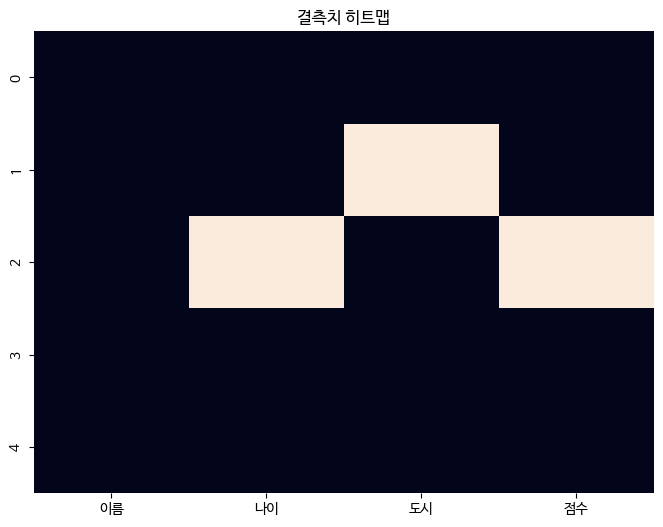

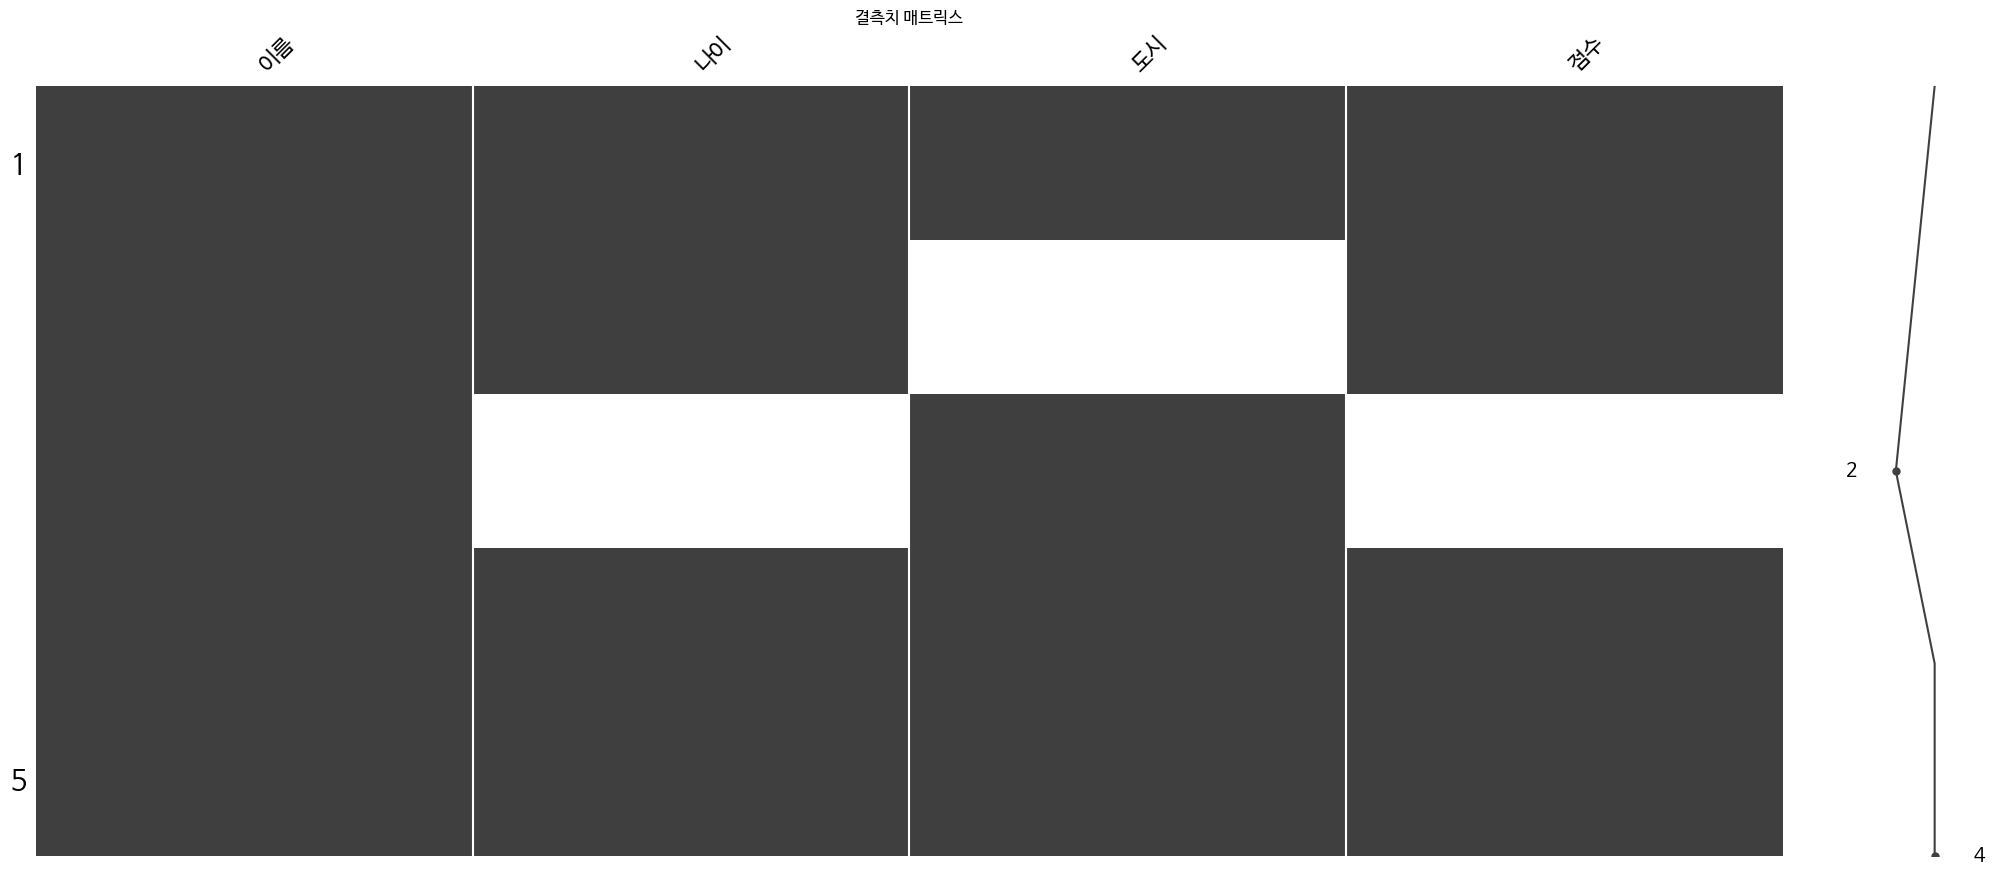

In [3]:
import numpy as np
import pandas as pd

### 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}
df = pd.DataFrame(data)

### 결측치 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("결측치 히트맵")
plt.show()

### 결측치 매트릭스
msno.matrix(df)
plt.title("결측치 매트릭스")
plt.show()

### 7-3 사분위 범위를 통한 이상치 찾기

In [5]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### 사분위 범위 경계값 계산
q1 = df['점수'].quantile(0.25)
q3 = df['점수'].quantile(0.75)
iqr = q3 - q1
하한값 = q1 - 1.5 * iqr
상한값 = q3 + 1.5 * iqr

### IQR 통계량 출력
print(q1)
print(q3)
print(iqr)
print(하한값) # 30
print(상한값) # 117
# 30 이하, 117 이상은 이상치로 취급


63.25
85.0
21.75
30.625
117.625


### 7-4 Z-점수를 통한 이상치 찾기

In [10]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### Z-점수 계산
점수_평균 = df['점수'].mean()
점수_표준편차 = df['점수'].std()
df['점수_Z'] = (df['점수'] - 점수_평균) / 점수_표준편차
df

### 임계값 설정 및 이상치 여부 판단
임계값 = 2 # 2 넘어가면 이상치
df['이상치여부'] = df['점수_Z'].abs() > 임계값 # 이상치여부 컬럼 생성
df

### 이상치 데이터 출력
df[df['이상치여부']]

### 이상치 비율 출력
df['이상치여부'].mean() * 100


np.float64(12.5)

### 7-5 평균값 및 선형보간법을 통한 결측치 처리

In [13]:
import pandas as pd
import numpy as np

file_path = "raw_large_shopping_customer.csv"
df = pd.read_csv(file_path)
print(df.isnull().sum())

df_cleaned = df.dropna(thresh=df.shape[1] - 1)
# thresh : 임계값
# shape[1] : 컬럼개수(5) -> df.shape[1] - 1 = 4
# dropna() : 4개 이상의 값이 채워진 것만 남김(결측치가 있어도 감내가능한 것만 남김)

### 나이, 소득에 있는 null 평균값 대치 및 결과 출력
df_cleaned.loc[:, ['나이', '소득']] = df_cleaned[['나이', '소득']].fillna(df_cleaned[['나이', '소득']].mean())
# df_cleaned.loc[:, ['나이', '소득']] : 모든 행에서 나이와 소득에 있는 null값만 인덱싱
# df_cleaned[['나이', '소득']] : 특정 컬럼에 있는 값만 선택
# fillna() : null값 채우기 메서드
# fillna(df_cleaned[['나이', '소득']].mean()) : 나이, 소득의 평균값으로 채우기


### 지출, 평균구매횟수 선형보간법 적용
df_cleaned.loc[:,['지출', '평균구매횟수']] = df_cleaned[['지출', '평균구매횟수']].interpolate(method='linear')

df_cleaned.to_csv("cleaned_large_shopping_customer.csv", index=False, encoding="utf-8-sig")

ID         0
나이        50
소득        50
지출        50
평균구매횟수    50
dtype: int64


### 7-6 DataFrame 값 변경

In [22]:
import pandas as pd

data = {'age': [25, 30, None, 22, 35],
        'city': ['Seoul', None, 'Incheon', 'Seoul', 'Daejeon'],
        'score': [90, 85, None, 80, 92]}
df = pd.DataFrame(data)

### replace를 이용한 Seoul -> 서울
df['city'] = df['city'].replace('Seoul', '서울')

### replace를 이용한 None -> 미정, Incheon -> 인천
df['city'] = df['city'].replace({None:'미정', 'Incheon':'인천'})


### map을 이용한 값 변경
df = pd.DataFrame(data)
city_map = {'Seoul': '서울특별시', None: '미정', 'Incheon':'인천광역시', 'Daejeon':'대전광역시'}
df['city'] = df['city'].map(city_map)
df['age_str'] = df['age'].map(lambda x: f" {x}살" if pd.notna(x) else "알수없음")

### apply 함수를 이용한 값 변경
df['age_apply'] = df['age'].apply(lambda x: x*2 if pd.notna(x) else None)
print("\napply 함수를 이용한 값 변경:\n", df['age_apply'])

### apply 함수를 이용한 행단위 값 변경
def age_plus_score(row):
    age = row['age'] if pd.notna(row['age']) else 0
    score = row['score'] if pd.notna(row['score']) else 0
    return age + score
df['age_plus_score'] = df.apply(age_plus_score, axis = 1)
# axis = 1 : 행단위 적용
print("\napply 함수를 이용한 값 변경:\n", df['age_plus_score'])

### loc 인덱스를 이용한 값 변경
df.loc[df['score'] < 90, 'score'] = 90
# 점수가 90점 이하인 것만 가져오고 그중 'score'열에 있는 값만 선택해서 90으로 바꿈

print("\n점수가 90점 미만인 사람 90점으로 변경:\n", df)

### where 함수를 이용한 값 변경(where 함수에 조건 입력)
df['age_where'] = df['age'].where(df['age']>=30, other = 0)
print("\nage가 30 이상인 값만 유지하고 나머지를 0으로 변경\n", df['age_where'])
df


apply 함수를 이용한 값 변경:
 0    50.0
1    60.0
2     NaN
3    44.0
4    70.0
Name: age_apply, dtype: float64

apply 함수를 이용한 값 변경:
 0    115.0
1    115.0
2      0.0
3    102.0
4    127.0
Name: age_plus_score, dtype: float64

점수가 90점 미만인 사람 90점으로 변경:
     age   city  score age_str  age_apply  age_plus_score
0  25.0  서울특별시   90.0   25.0살       50.0           115.0
1  30.0     미정   90.0   30.0살       60.0           115.0
2   NaN  인천광역시    NaN    알수없음        NaN             0.0
3  22.0  서울특별시   90.0   22.0살       44.0           102.0
4  35.0  대전광역시   92.0   35.0살       70.0           127.0

age가 30 이상인 값만 유지하고 나머지를 0으로 변경
 0     0.0
1    30.0
2     0.0
3     0.0
4    35.0
Name: age_where, dtype: float64


,age,city,score,age_str,age_apply,age_plus_score,age_where
0,25.0,서울특별시,90.0,25.0살,50.0,115.0,0.0
1,30.0,미정,90.0,30.0살,60.0,115.0,30.0
2,NaN,인천광역시,NaN,알수없음,NaN,0.0,0.0
3,22.0,서울특별시,90.0,22.0살,44.0,102.0,0.0
4,35.0,대전광역시,92.0,35.0살,70.0,127.0,35.0


### 7-7 날짜 데이터 타입 다루기


In [30]:
date_str = ['2025-07-01', '2025-08-01', '2025-09-01']
df_date = pd.DataFrame({'date_str':date_str})

### datetime 타입 변환(겉으로 같아보이지만 데이터타입 바뀜)
df_date['date'] = pd.to_datetime(df_date['date_str'])

### 날짜 데이터 분리
df_date['date'].dt.year
print(df_date['date'].dt.year)
print(df_date['date'].dt.month)
print(df_date['date'].dt.day)
print(df_date['date'].dt.day_name())

### 날짜 데이터 포멧 변경
df_date['date_formatted'] = df_date['date'].dt.strftime('%Y/%m/%d')
df_date

0    2025
1    2025
2    2025
Name: date, dtype: int32
0    7
1    8
2    9
Name: date, dtype: int32
0    1
1    1
2    1
Name: date, dtype: int32
0    Tuesday
1     Friday
2     Monday
Name: date, dtype: object


,date_str,date,date_formatted
0,2025-07-01,2025-07-01,2025/07/01
1,2025-08-01,2025-08-01,2025/08/01
2,2025-09-01,2025-09-01,2025/09/01


## 7-8 실습 시나리오 - 데이터 정제

### [재수행] 6-5 실습 시나리오 - Kaggle을 활용한 데이터 수집 및 측정

In [31]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"youngjiseo","key":"7c362353b1e0ebbbab05f2aa25cace6a"}'}

In [32]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [33]:
!kaggle competitions download -c store-sales-time-series-forecasting

!unzip store-sales-time-series-forecasting.zip

  0% 0.00/21.4M [00:00<?, ?B/s]
100% 21.4M/21.4M [00:00<00:00, 594MB/s]
Archive:  store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


In [37]:
import pandas as pd

# Grocery Sales 데이터 DataFrame 로드
train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv')
oil = pd.read_csv('oil.csv')
holidays_events = pd.read_csv('holidays_events.csv')

train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


### 데이터 분포 시각화

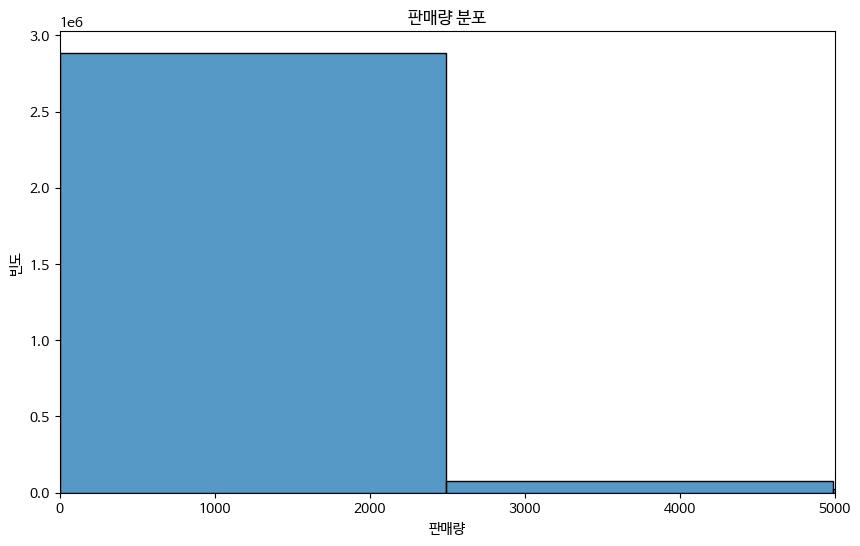

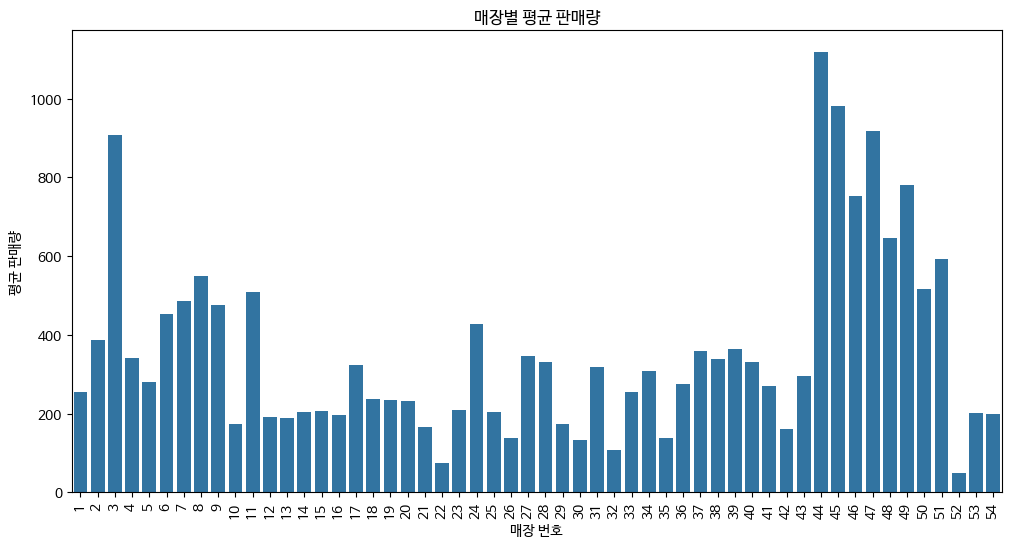

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(train['sales'], bins=50)
plt.title("판매량 분포")
plt.xlabel("판매량")
plt.ylabel("빈도")
plt.xlim(0, 5000)
plt.show()

store_sales = train.groupby('store_nbr')['sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='store_nbr', y='sales', data=store_sales)
plt.title("매장별 평균 판매량")
plt.xlabel("매장 번호")
plt.ylabel("평균 판매량")
plt.xticks(rotation=90)
plt.show()

### 결측치 처리

In [43]:
## 판매, 매장, 거래, 원유, 휴일이벤트 데이터 결측치

print(train.isnull().sum()) # 없음
print(stores.isnull().sum())
print(transactions.isnull().sum())
print(oil.isnull().sum())
print(holidays_events.isnull().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
date            0
store_nbr       0
transactions    0
dtype: int64
date           0
dcoilwtico    43
dtype: int64
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


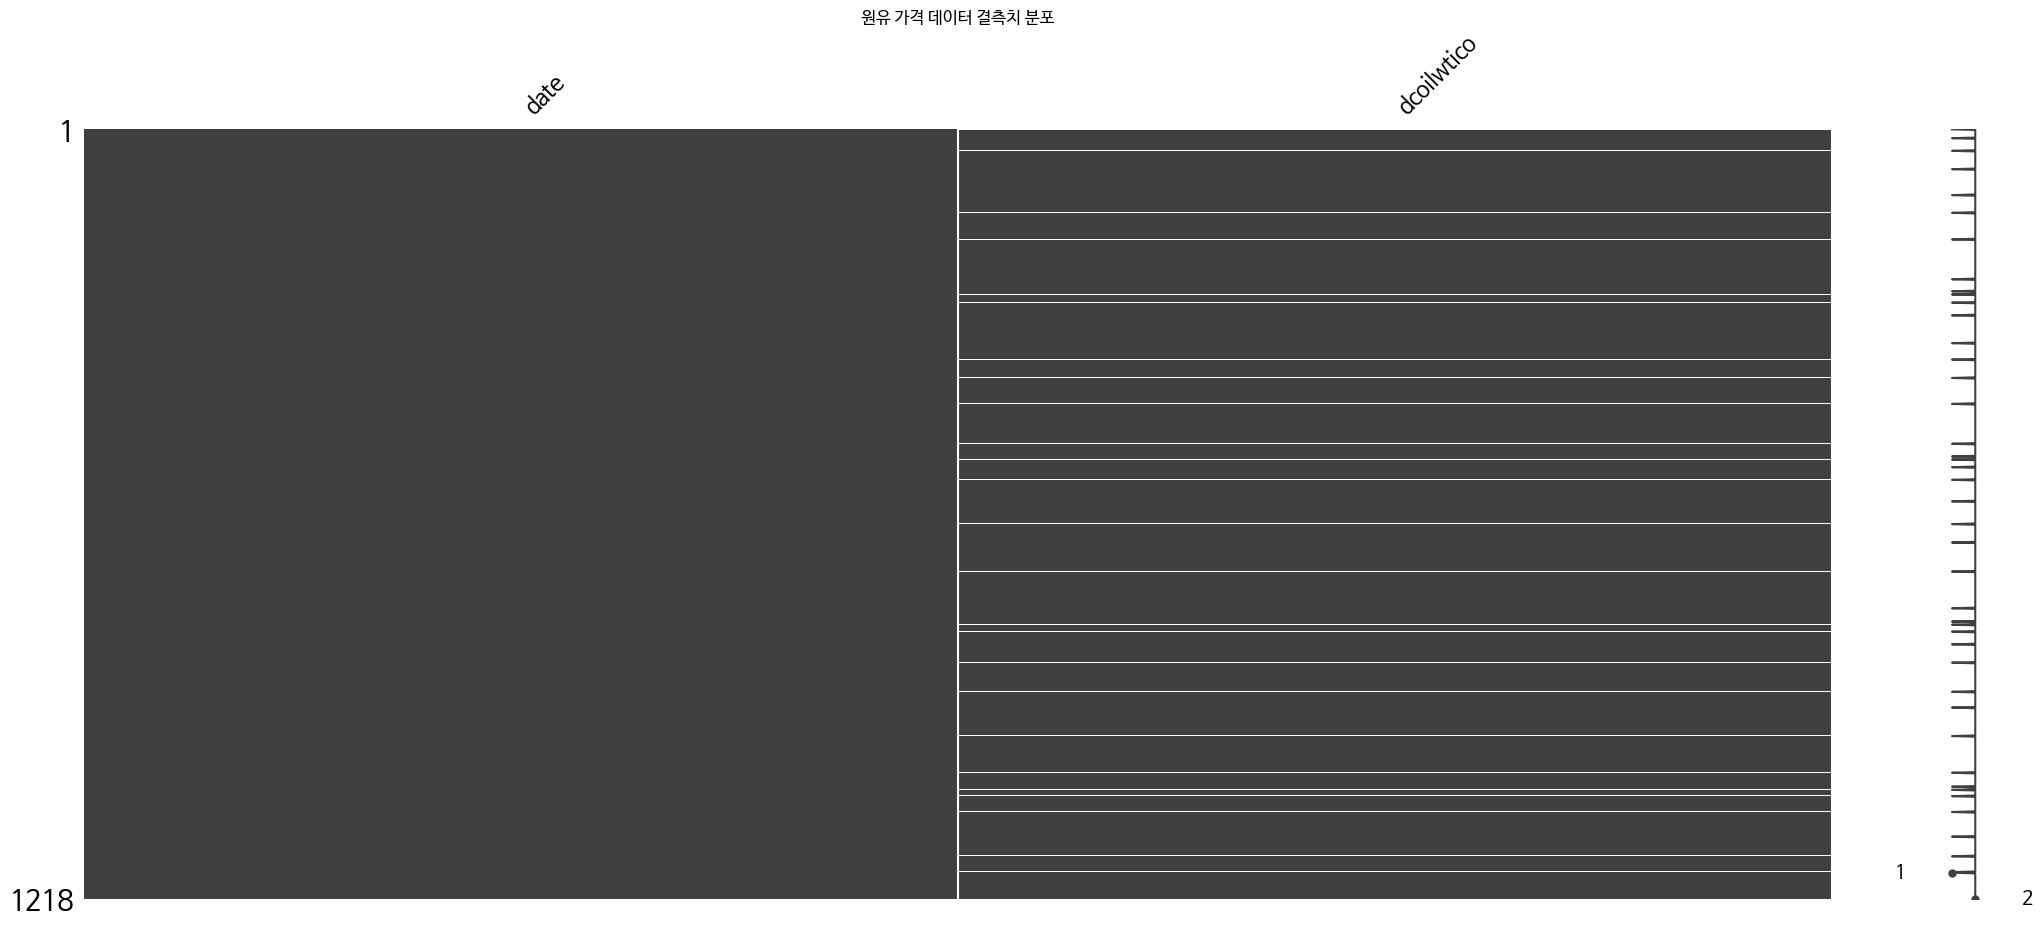

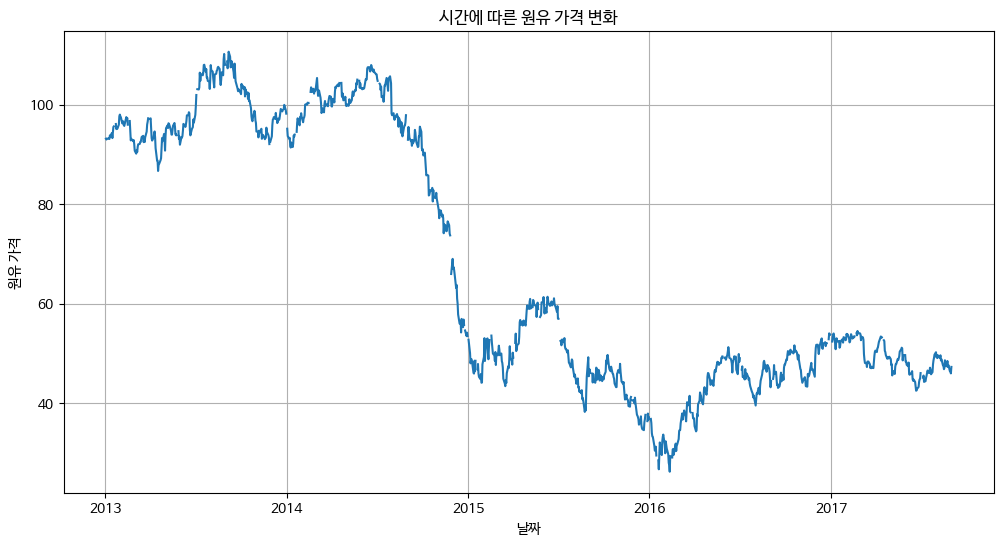

In [44]:
import missingno as msno

msno.matrix(oil)
plt.title("원유 가격 데이터 결측치 분포")
plt.show()

oil['date'] = pd.to_datetime(oil['date'])
plt.figure(figsize=(12, 6))
plt.plot(oil['date'], oil['dcoilwtico'])
plt.title("시간에 따른 원유 가격 변화")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

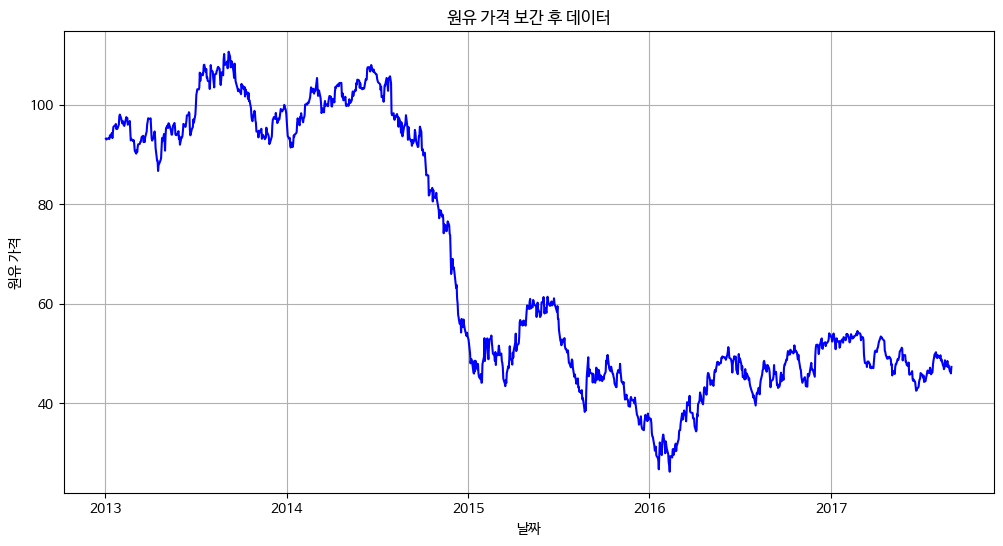

In [45]:
oil_cleaned = oil.copy()

### 선형 보간법 적용한 원유 가격 데이터
oil_cleaned['dcoilwtico'] = oil_cleaned['dcoilwtico'].interpolate(method='linear')

plt.figure(figsize=(12, 6))
plt.plot(oil_cleaned['date'], oil_cleaned['dcoilwtico'], 'b-')
plt.title("원유 가격 보간 후 데이터")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

### 이상치 처리

이상치 개수: 200,274건
전체 대비 비율: 6.67%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


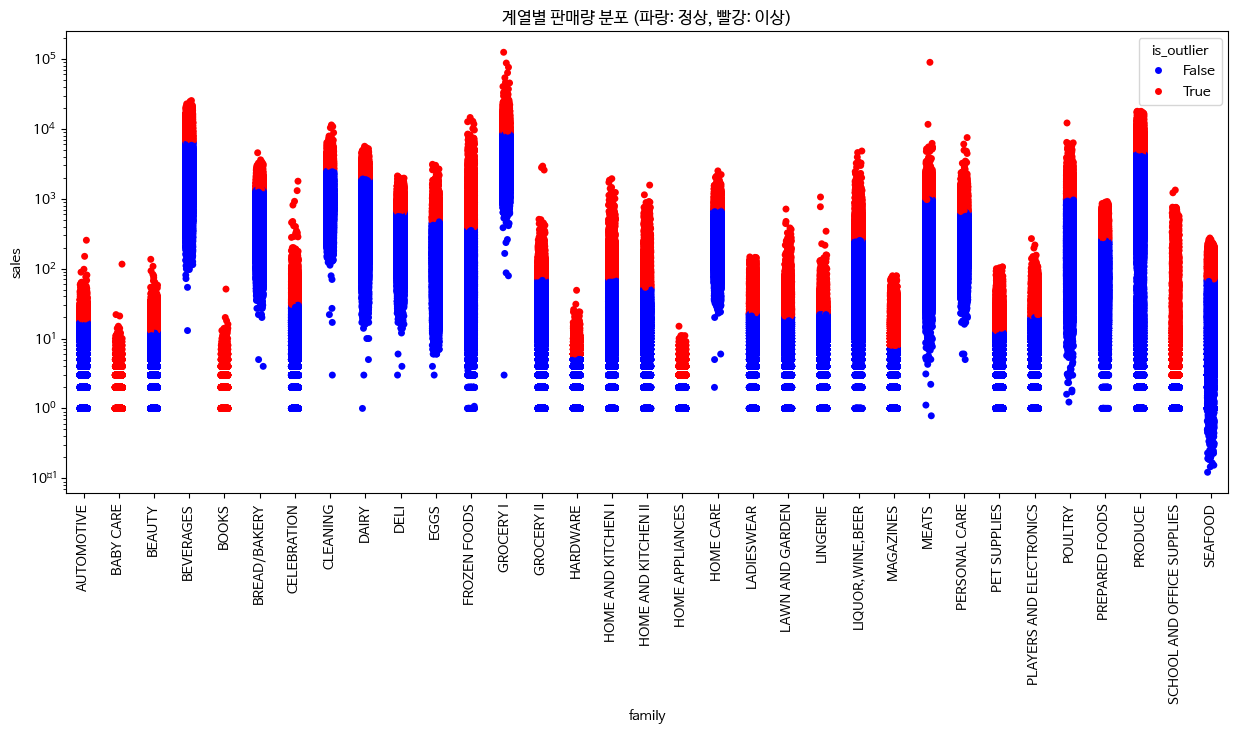

In [47]:
### 제품 계열별 판매 데이터 IQR 계산
family_bounds = train.groupby('family')['sales'].apply(
    lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))
)

### 상한값 초과 판매량 이상치 분류
train_enhanced = train.copy()
train_enhanced['upper_bound'] = train_enhanced['family'].map(family_bounds)
train_enhanced['is_outlier'] = train_enhanced['sales'] > train_enhanced['upper_bound']

total_outliers = train_enhanced['is_outlier'].sum() # 이상치 개수의 합
total_ratio = train_enhanced['is_outlier'].mean() # 이상치 비율

print(f"이상치 개수: {total_outliers:,}건")
print(f"전체 대비 비율: {total_ratio:.2%}")

plt.figure(figsize=(15,6))
sns.stripplot(x='family', y='sales', hue=train_enhanced['is_outlier'],
              data=train_enhanced, palette={False:'blue', True:'red'})
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('계열별 판매량 분포 (파랑: 정상, 빨강: 이상)')
plt.show()

In [50]:
### 판매량이 상한값 초과 시, 판매량으로 상한값으로 대체
train_cleaned  = train.copy()
train_cleaned.loc[train_enhanced['is_outlier'], 'sales'] = train_enhanced.loc[train_enhanced['is_outlier'], 'upper_bound']
# 'sales'에 있는 이상치를 'upper_bound'에 있는 이상치로 바꿈

changed_count = (train['sales'] != train_cleaned ['sales']).sum()
print(f"대체된 데이터 수: {changed_count}건")

대체된 데이터 수: 200274건


### 날짜 데이터 처리

In [51]:
### 판매, 거래, 휴일 이벤트, 원율 데이터 내 date 컬럼 데이터 datetime 데이터 타입으로 변경
train_cleaned['date'] = pd.to_datetime(train_cleaned['date'])
transactions['date'] = pd.to_datetime(transactions['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
oil_cleaned['date'] = pd.to_datetime(oil_cleaned['date'])

train_cleaned['year'] = train_cleaned['date'].dt.year
train_cleaned['month'] = train_cleaned['date'].dt.month
train_cleaned['day'] = train_cleaned['date'].dt.day
train_cleaned['dayofweek'] = train_cleaned['date'].dt.dayofweek
### 주말, 월초, 월말 여부 추철
train_cleaned['weekend'] = train_cleaned['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
train_cleaned['is_month_start'] = train_cleaned['date'].dt.is_month_start
train_cleaned['is_month_end'] = train_cleaned['date'].dt.is_month_end

print("날짜 특성 추출 결과:")
print(train_cleaned[['date', 'year', 'month', 'day', 'dayofweek', 'weekend', 'is_month_start', 'is_month_end']].head())

날짜 특성 추출 결과:
        date  year  month  day  dayofweek  weekend  is_month_start  \
0 2013-01-01  2013      1    1          1        0            True   
1 2013-01-01  2013      1    1          1        0            True   
2 2013-01-01  2013      1    1          1        0            True   
3 2013-01-01  2013      1    1          1        0            True   
4 2013-01-01  2013      1    1          1        0            True   

   is_month_end  
0         False  
1         False  
2         False  
3         False  
4         False  


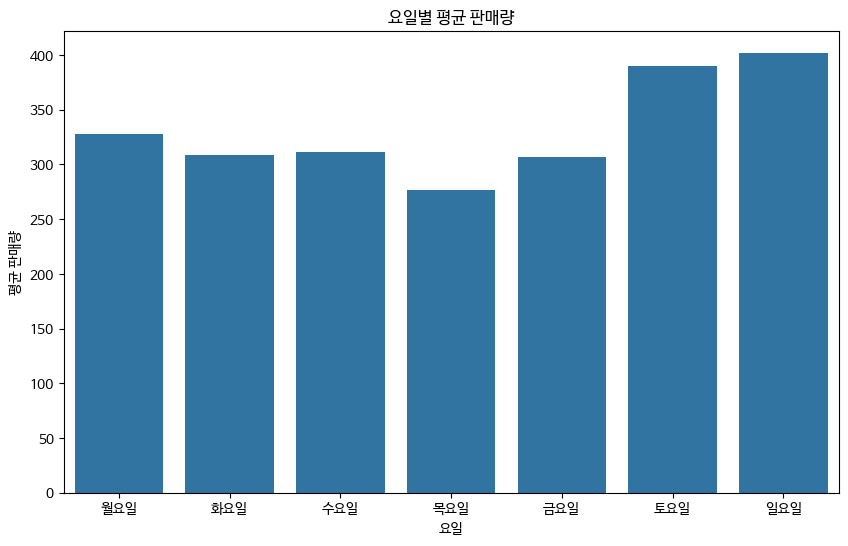

In [52]:
## 요일별 평균 판매량을 계산
day_sales = train_cleaned.groupby('dayofweek')['sales'].mean().reset_index()

## 요일 출력값 변경
day_sales['day_name'] = day_sales['dayofweek'].map({
    0:'월요일', 1:'화요일', 2:'수요일', 3:'목요일',
    4:'금요일', 5:'토요일', 6:'일요일'
})


plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='sales', data=day_sales)
plt.title("요일별 평균 판매량")
plt.xlabel("요일")
plt.ylabel("평균 판매량")
plt.show()

### 데이터 통합

In [53]:
## 판매, 거래 데이터 통합
train_with_trans = pd.merge(
    train_cleaned, transactions,
    on=['date', 'store_nbr'],
    how='left'
)

## 매장 데이터 통합
train_with_store = pd.merge(
    train_with_trans, stores,
    on=['store_nbr'],
    how='left'
)

## 원유 데이터 통합
train_final = pd.merge(
    train_with_store, oil_cleaned,
    on='date',
    how='left'
)



print("최종 데이터셋 정보:")
print(f"행 개수: {train_final.shape[0]}, 열 개수: {train_final.shape[1]}")
print(train_final.columns.tolist())
print(train_final.head())

최종 데이터셋 정보:
행 개수: 3000888, 열 개수: 19
['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month', 'day', 'dayofweek', 'weekend', 'is_month_start', 'is_month_end', 'transactions', 'city', 'state', 'type', 'cluster', 'dcoilwtico']
   id       date  store_nbr      family  sales  onpromotion  year  month  day  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013      1    1   
1   1 2013-01-01          1   BABY CARE    0.0            0  2013      1    1   
2   2 2013-01-01          1      BEAUTY    0.0            0  2013      1    1   
3   3 2013-01-01          1   BEVERAGES    0.0            0  2013      1    1   
4   4 2013-01-01          1       BOOKS    0.0            0  2013      1    1   

   dayofweek  weekend  is_month_start  is_month_end  transactions   city  \
0          1        0            True         False           NaN  Quito   
1          1        0            True         False           NaN  Quito   
2          1        0            True  